In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/train.csv",usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [7]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train["Age_imputed"]=X_train["Age"]
X_test["Age_imputed"]=X_test["Age"]

C:\Users\ABDURR~1\AppData\Local\Temp/ipykernel_1648/3782172226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Age_imputed"]=X_train["Age"]
C:\Users\ABDURR~1\AppData\Local\Temp/ipykernel_1648/3782172226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Age_imputed"]=X_test["Age"]


In [9]:
X_test

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0


In [10]:
X_train["Age"].isna().sum()

148

In [11]:
X_train["Age_imputed"][X_train["Age_imputed"].isna()] = X_train["Age"].dropna().sample(X_train["Age"].isna().sum()).values
X_test["Age_imputed"][X_test["Age_imputed"].isna()] = X_test["Age"].dropna().sample(X_test["Age"].isna().sum()).values


C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [12]:
X_train["Age_imputed"].isna().sum()

0

In [13]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,52.0
493,71.0,49.5042,71.0
527,NaN,221.7792,4.0


C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_imputed', ylabel='Density'>

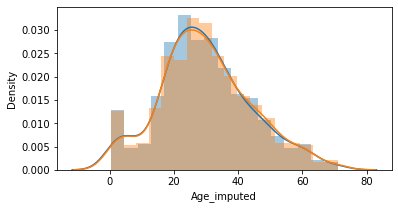

In [14]:
fig=plt.figure(figsize=(6,3))
ax = fig.add_subplot(111,)
sns.distplot(X_train["Age"])
# ax = fig.add_subplot(112)
sns.distplot(X_train["Age_imputed"])

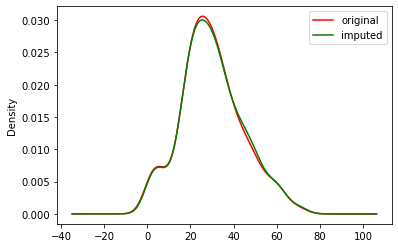

In [15]:
X_train["Age"].plot.density(color="red",label="original")
X_train["Age_imputed"].plot.density(color="green",label="imputed")
plt.legend()

In [16]:
X_train["Age"].var(),X_train["Age_imputed"].var()


(204.3495133904614, 207.26683345797963)

In [17]:
X_train.cov()

,Age,Fare,Age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,45.208413
Age_imputed,204.349513,45.208413,207.266833


<AxesSubplot:>

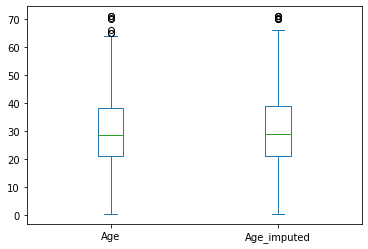

In [18]:
X_train[["Age","Age_imputed"]].plot.box()

# for production

In [19]:
# sample_value=X_train["Age"].dropna().sample(1,random_state=int(obserbation=["Fare"]))
# sample_value=X_train["Age"].dropna().sample(1,random_state=int(obserbation=["Fare"]))
# sampled_value = X_train['Age'].dropna().sample()
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


NameError: name 'observation' is not defined

In [21]:
diff={
    "name":"riad",
    "varsity":"national universit"
}

In [24]:
diff["name"]

'riad'